# Student Performance dataset

Importng Important libararies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing CSV as dataframe

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
#Checking records, first 5
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

# Dataset information
1.gender : sex of students -> (Male/female)

2.race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

3.parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's 

4.degree,high school)

5.lunch : having lunch before test (standard or free/reduced)

6.test preparation course : complete or not complete before test

7.math score

8.writing score

In [6]:
#checking missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

In [7]:
#checking duplicate values
df.duplicated().sum()

0

There are no duplicate values in the dataset

In [8]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#checking the uniques values in the dataset
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
#checking the statistica of the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights

 - Men for math score, reading score and writing score are nearly equal, between 66 to 70.
    
- minimum values for math is 0 , reading scores is 17 and writing scores is 10 approx.

- SD for  math score, reading score and writing score is almost rqual for all three numerical column

# Data Exploration

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print(f"Categories in gender : {df['gender'].unique()}")
print(f"Categories in race/ethnicity : {df['race/ethnicity'].unique()}")
print(f"Categories in parental level of education : {df['parental level of education'].unique()}")
print(f"Categories in lunch : {df['lunch'].unique()}")
print(f"Categories in test preparation course : {df['test preparation course'].unique()}")

Categories in gender : ['female' 'male']
Categories in race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test preparation course : ['none' 'completed']


In [13]:
# Segrregating numericl and categoricl columns

numerical_columns = [feature for feature in df.columns if df[feature].dtypes!='O']
calegorical_columns = [feature for feature in df.columns if df[feature].dtypes=='O']

#getting values, features
print(f" numerical columns {len(numerical_columns)} :{numerical_columns}")
print(f" calegorical columns {len(calegorical_columns)} :{calegorical_columns}")


 numerical columns 3 :['math score', 'reading score', 'writing score']
 calegorical columns 5 :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Increasing features to get more features, may get better accuracy in modeling stage

In [14]:
df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


How many students got full marks on their respective categories

In [15]:
maths_full = df[df['math score']==100]['average'].count()
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()

print(f"Number of students with full marks in maths: {maths_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


How many students got less than 20 in respective categories

In [16]:
maths_less_20 = df[df['math score']<=20]['average'].count()
reading_less_20 = df[df['reading score']<=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()

print(f"Number of students with less than 20 marks in maths: {maths_less_20}")
print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")

Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


Insights

-Students performed well in reading section and worst in maths

# Data visualization

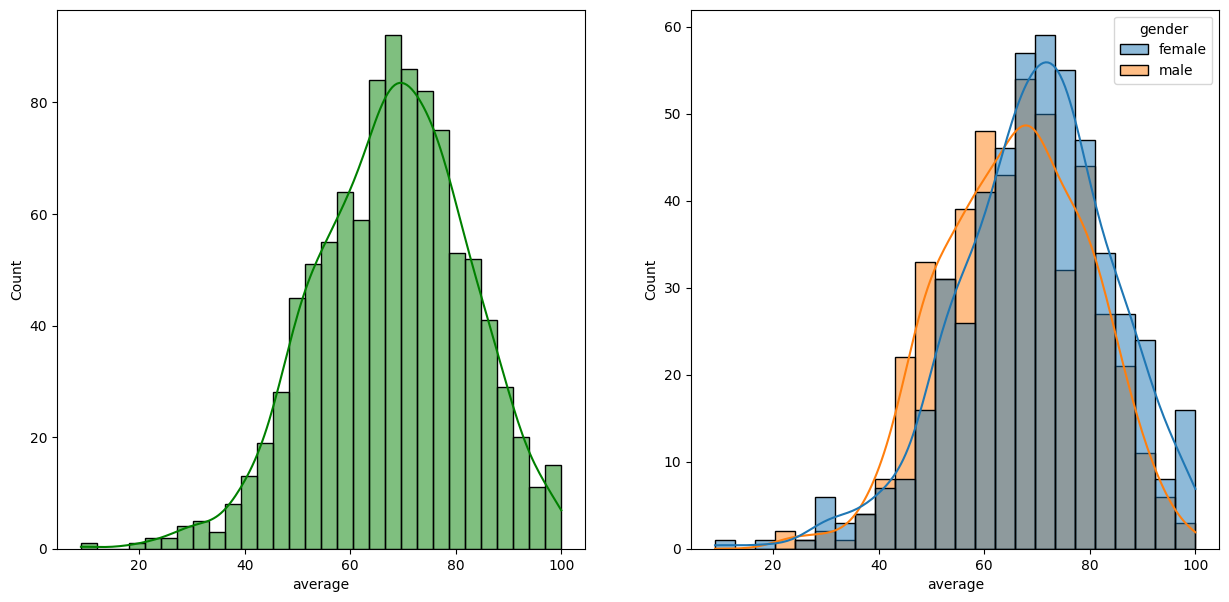

In [17]:
#checking avearge and total score got by students w.r.t gender

fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

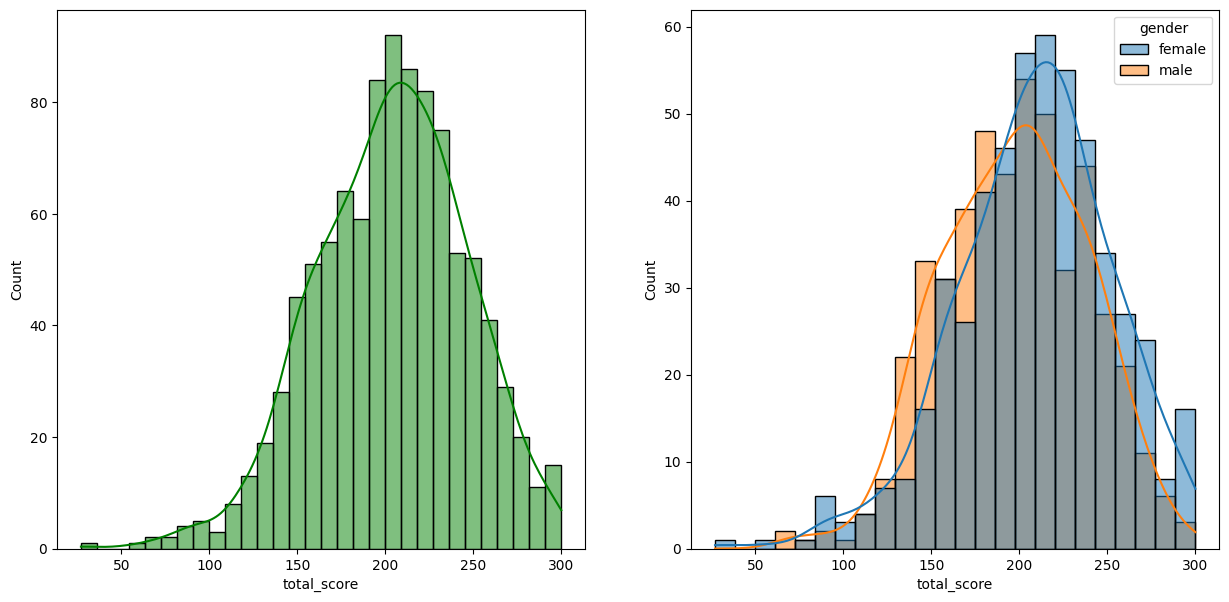

In [18]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Insight: In terms of avearge and total score female students seems to attain good scores than male counterpart

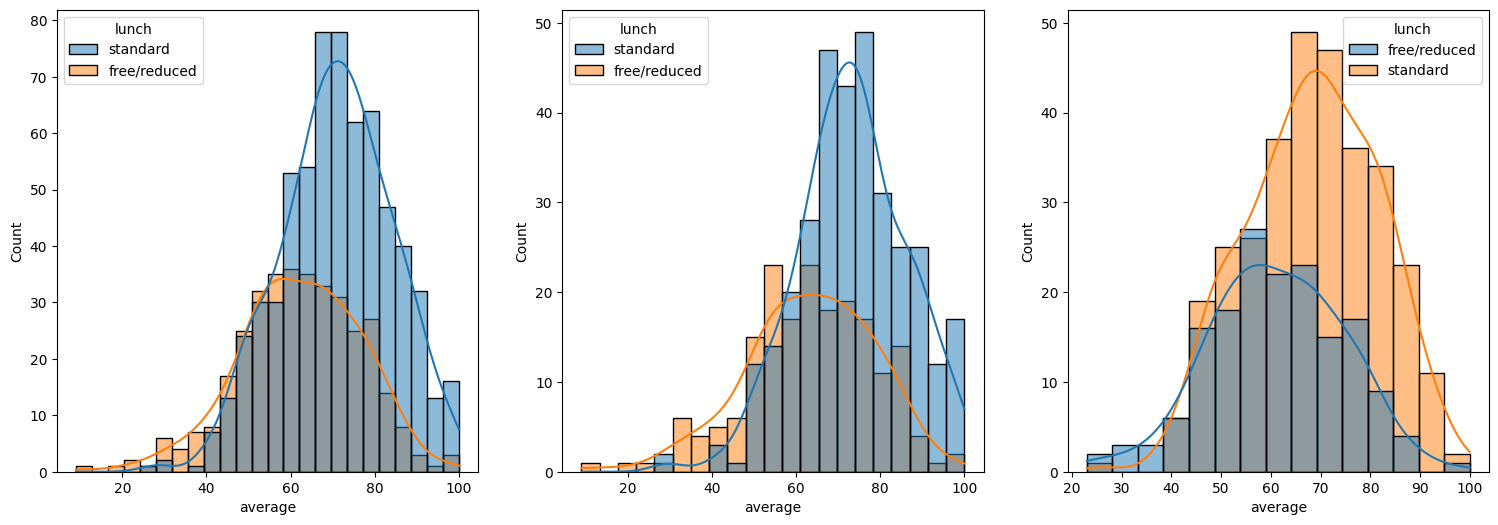

In [19]:
# score comparing w.r.t lunch

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insight : Standard luch boost the male and female in scoring good marks

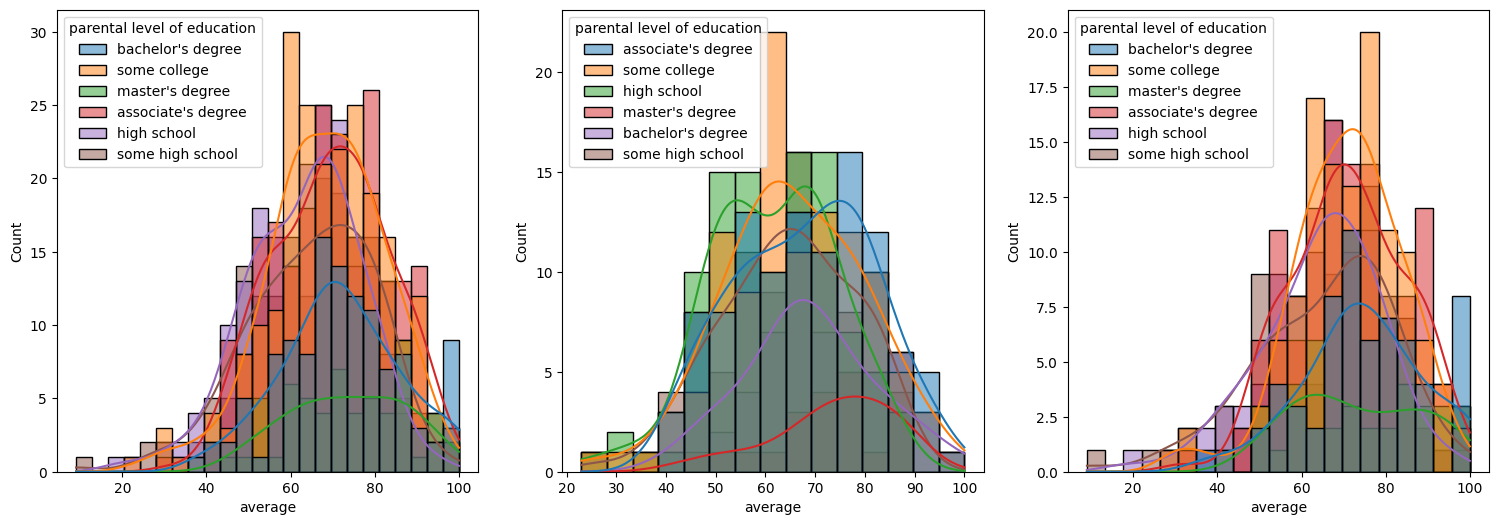

In [20]:
# scores with respect to parent edu

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

Insight:
    
    Parents with associate degree or some degree gives a positive feedback
    in males and females parents with some degree tends to give some positive results.

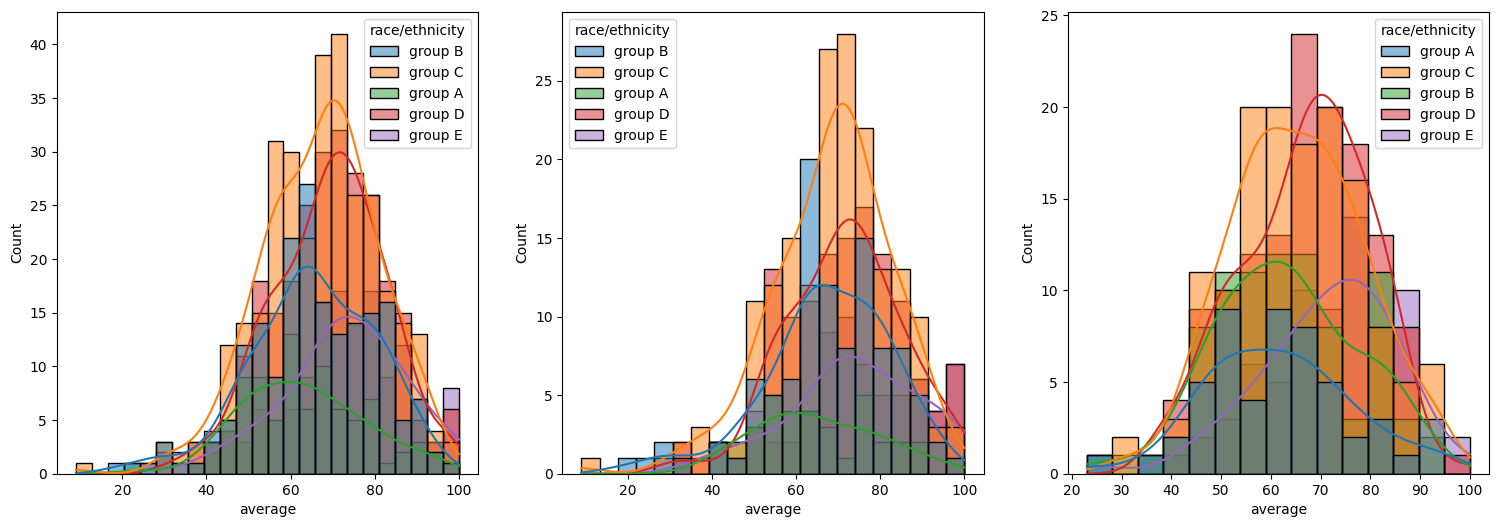

In [21]:
#scores w.r.t race/ethnecity

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Insight:
    Overall it seems group C race scores good marks.
    In males also group c have a positive feedback while in females group c and D are dominant

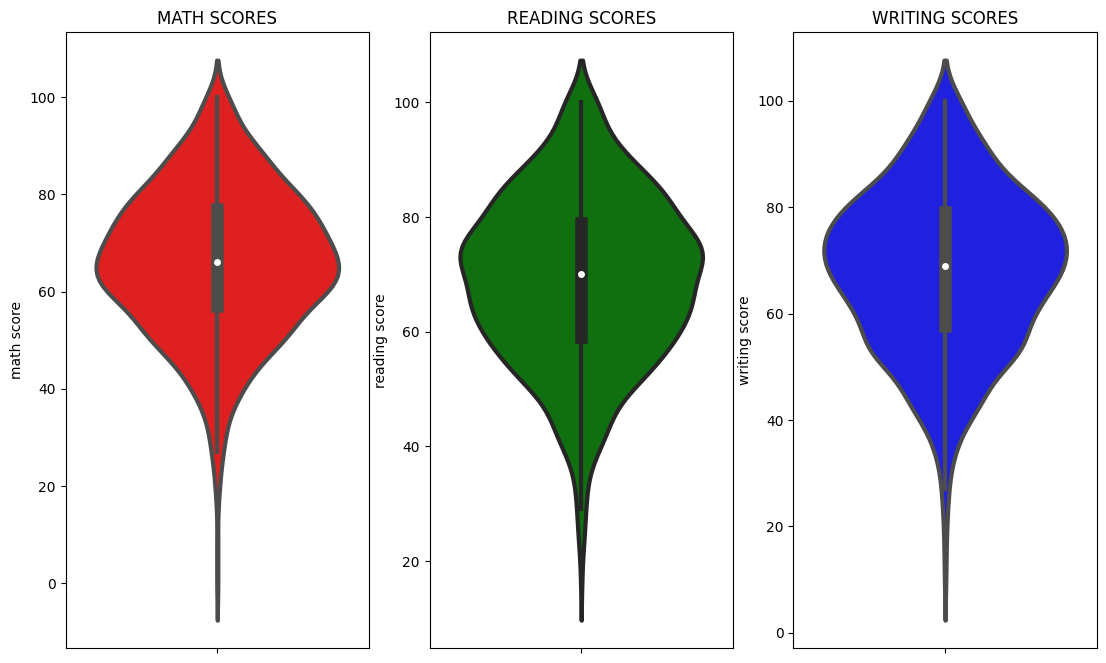

In [22]:
#comparing all three subjects

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Insight:
    we can see from above distribution that in maths most of the students scored between 60-80, while in reading and writing 50-80

# Multivariate analysis

In [23]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [24]:
print(f"Categories in gender : {df['gender'].unique()}")
print(f"Categories in race/ethnicity : {df['race/ethnicity'].unique()}")
print(f"Categories in parental level of education : {df['parental level of education'].unique()}")
print(f"Categories in lunch : {df['lunch'].unique()}")
print(f"Categories in test preparation course : {df['test preparation course'].unique()}")

Categories in gender : ['female' 'male']
Categories in race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test preparation course : ['none' 'completed']


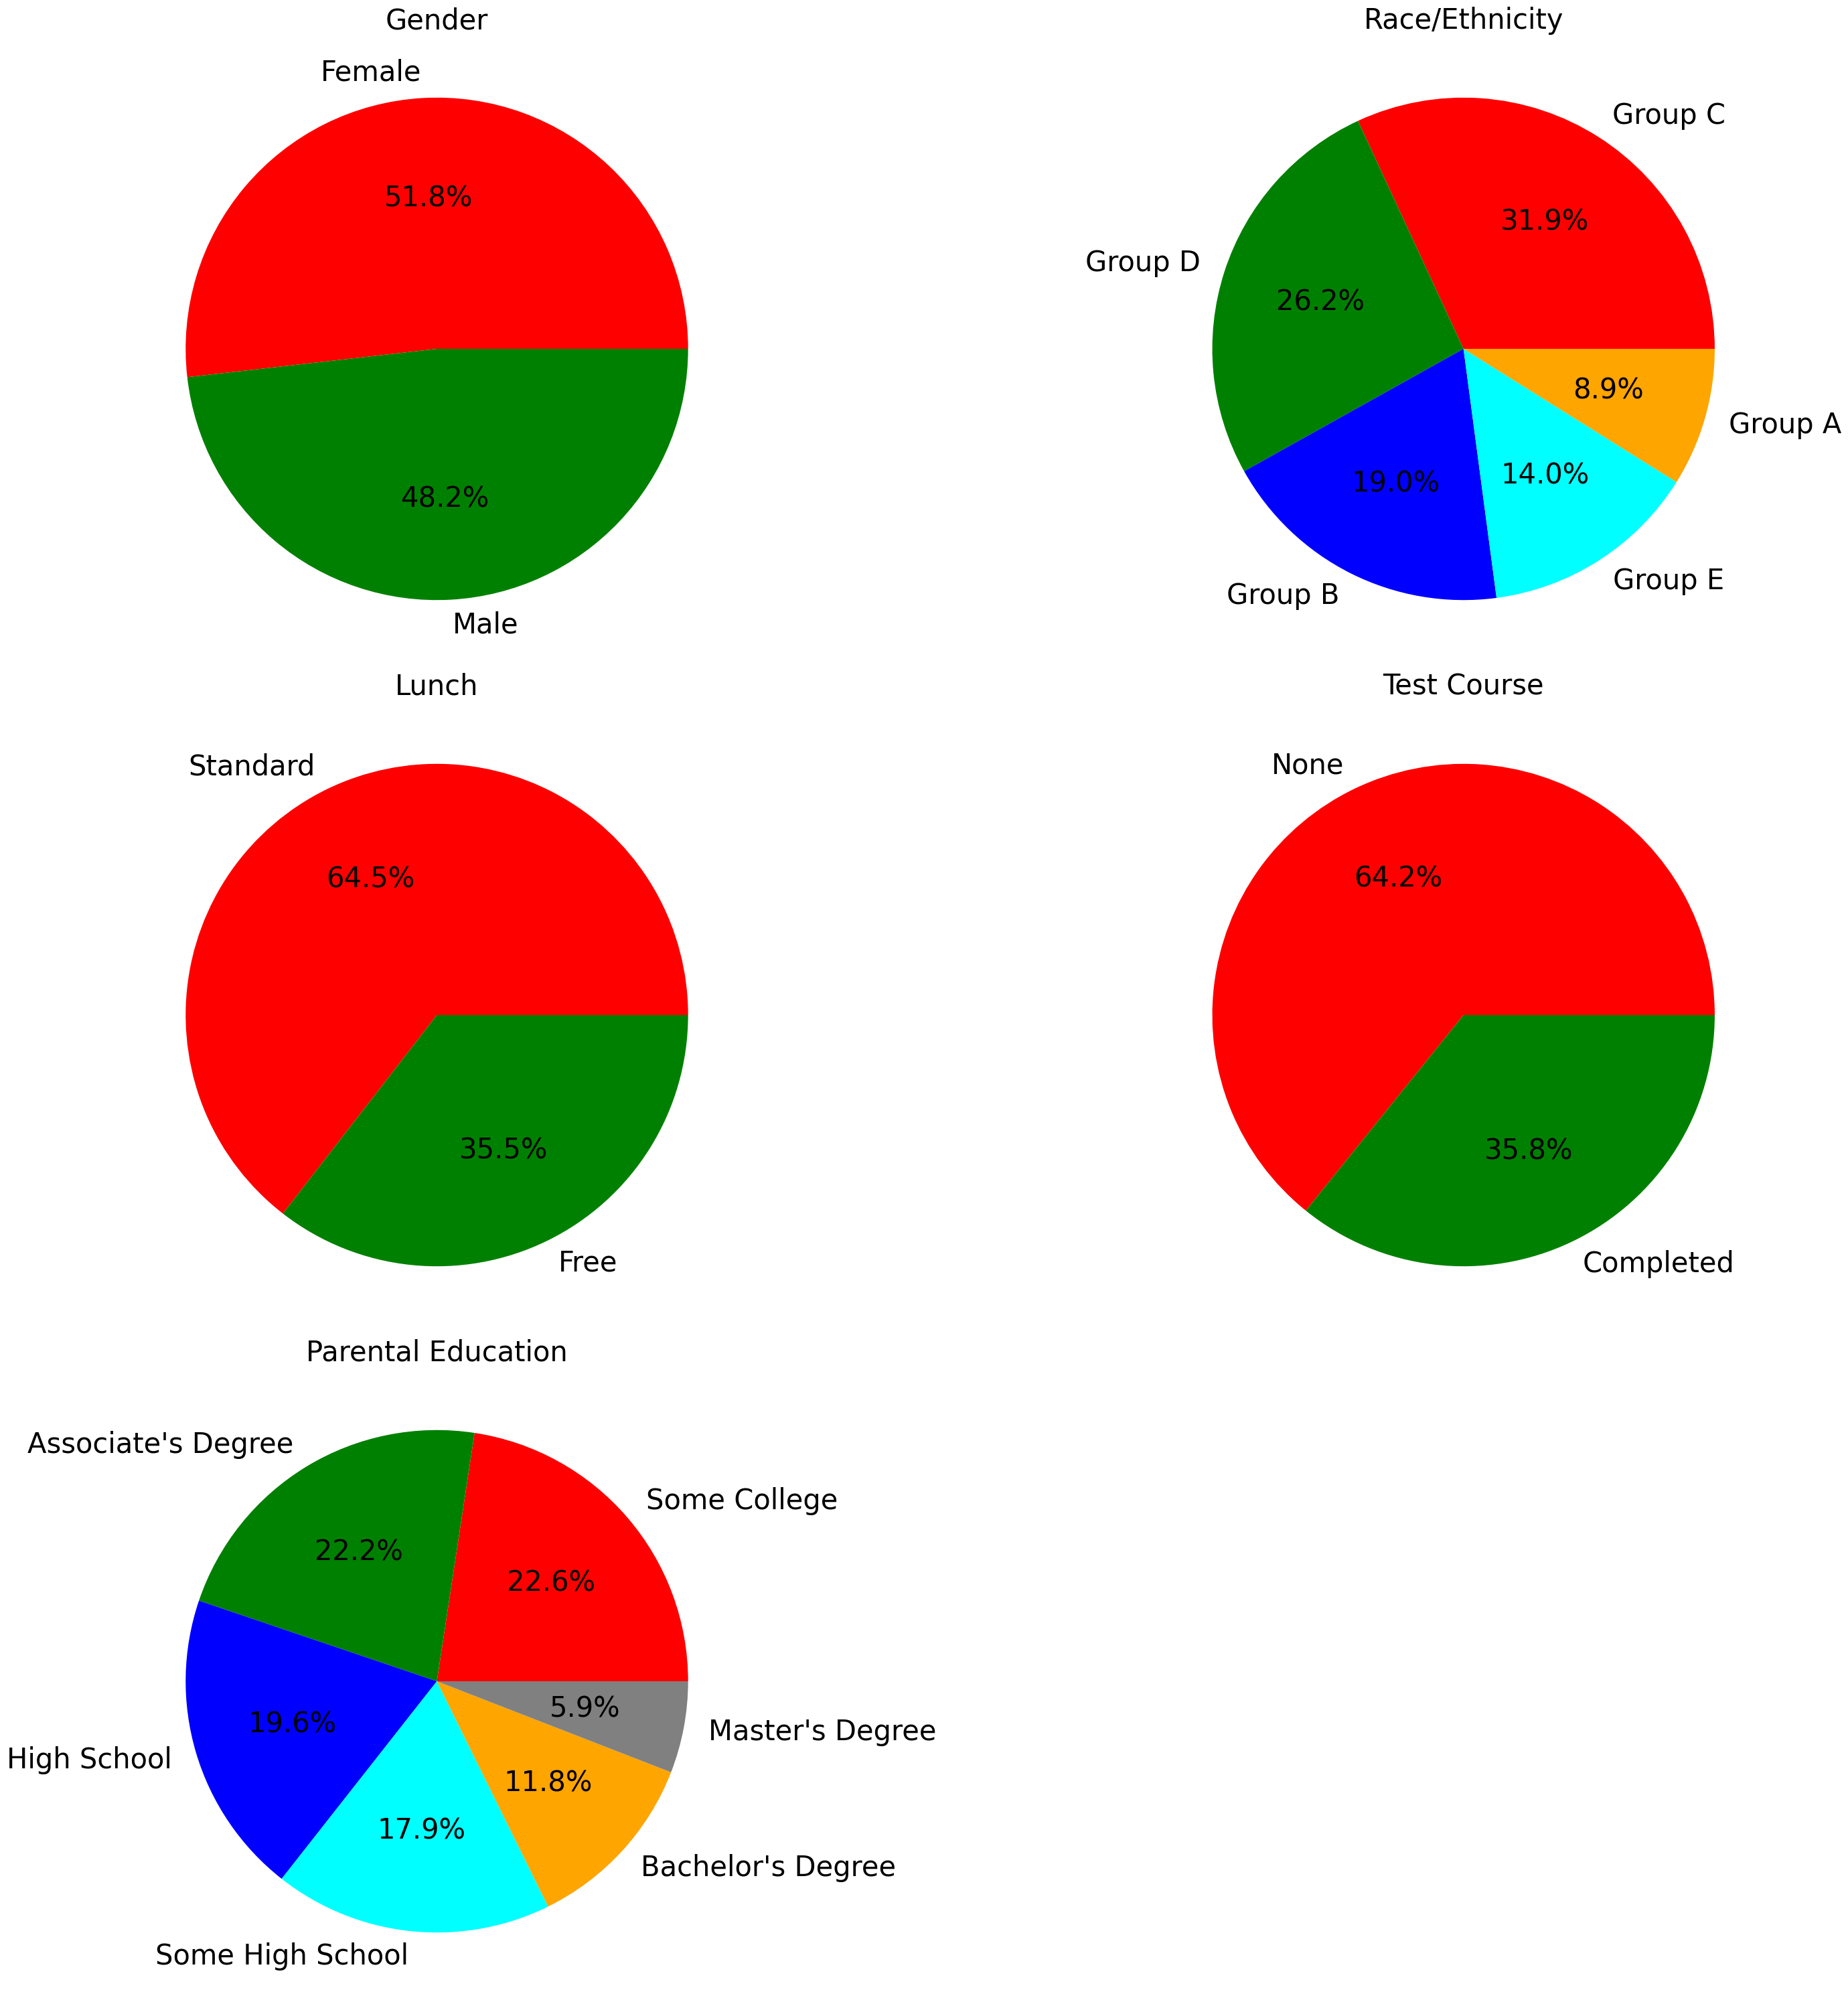

In [25]:
plt.rcParams['figure.figsize'] = (30, 30)
textprops = {"fontsize":30}

plt.subplot(3, 2,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%2.1f%%',textprops =textprops)
plt.title('Gender', fontsize = 30)
plt.axis('off')



plt.subplot(3,2,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%2.1f%%',textprops =textprops)
plt.title('Race/Ethnicity', fontsize = 30)
plt.axis('off')



plt.subplot(3,2,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2.1f%%',textprops =textprops)
plt.title('Lunch', fontsize = 30)
plt.axis('off')


plt.subplot(3,2,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2.1f%%',textprops =textprops)
plt.title('Test Course', fontsize = 30)
plt.axis('off')


plt.subplot(3,2,5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%2.1f%%',textprops =textprops)
plt.title('Parental Education', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insight:

    Male and female are same in number
    
    Grop C has more number of students
    
    standard lunch consumer are more
    
    students opted for no test are more
    
    some degree and associate degree parets are more than oter qualification

# Distribution - Gender Univariate and bivariate analysis

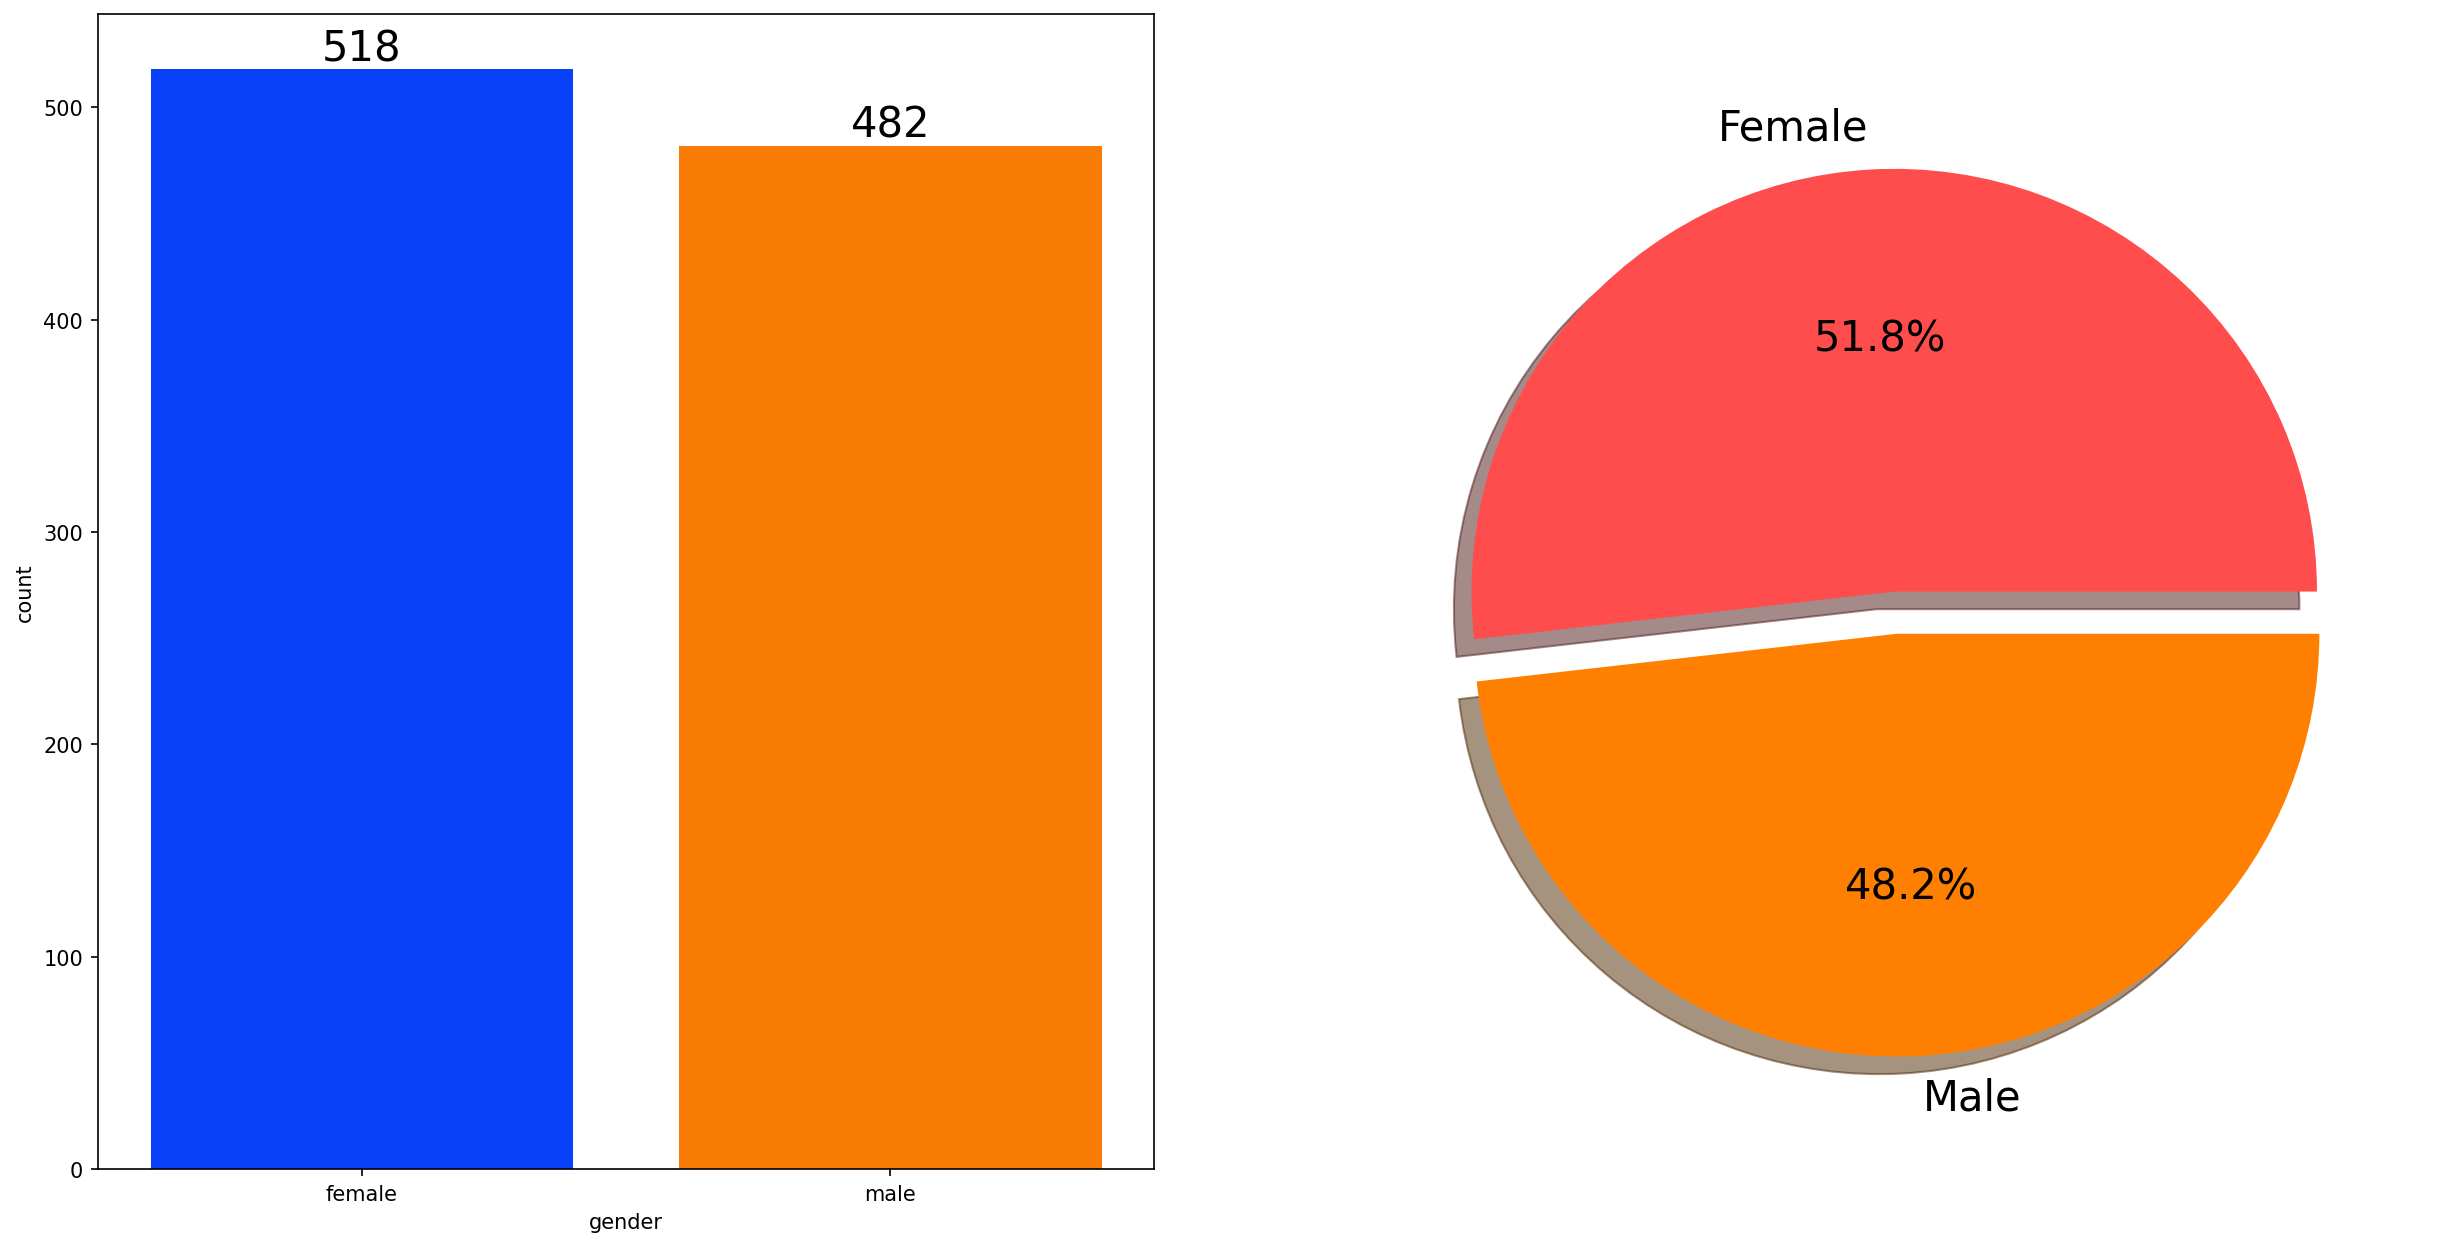

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10),dpi=150)
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'],textprops = {"fontsize":20})
plt.show()

Data is balanced Male- 48.2%,518 and Female - 51.8%,482

In [27]:
#bivariate analysis based on gender
gender_group = df.groupby('gender').mean()

In [28]:
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


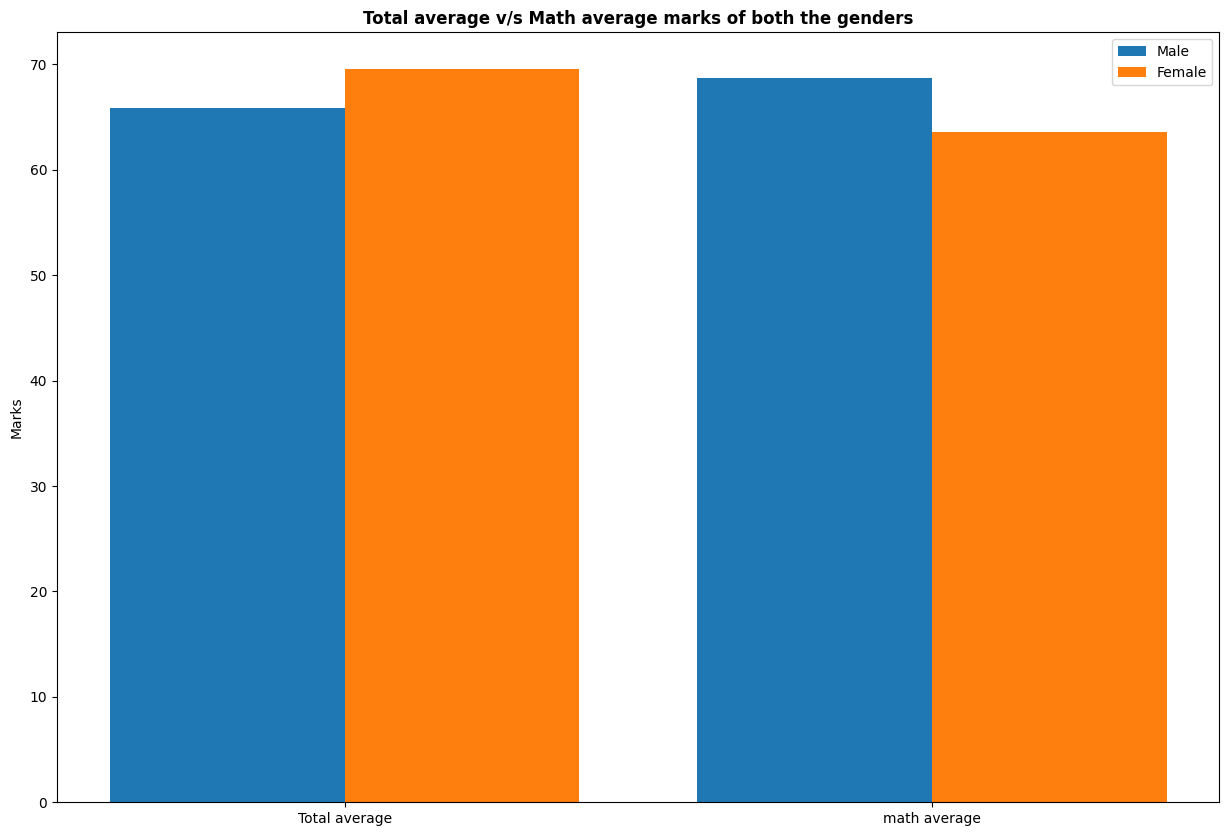

In [29]:
plt.figure(figsize=(15,10))

X = ['Total average','math average']

female_scores = [gender_group['average'][0],gender_group['math score'][0]]
male_scores = [gender_group['average'][1],gender_group['math score'][1]]

X_axis= np.arange(len(X))

plt.bar(X_axis-0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

# Univariate and bivariate analysis - race/ethnicity

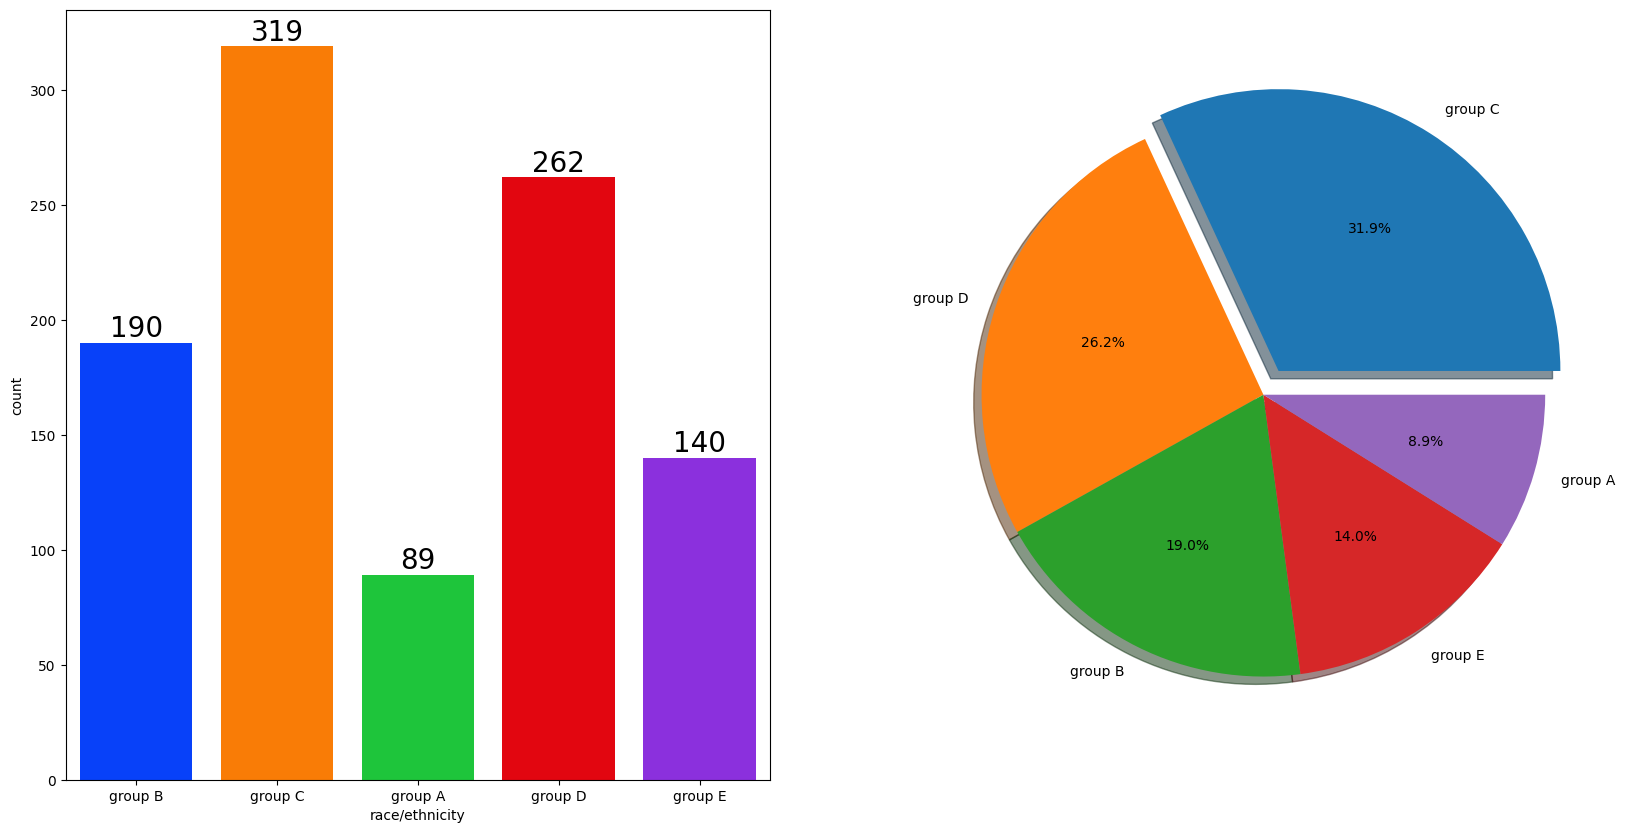

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

Insight:
    
    Group c and D have more represemtation in racewise
    
    group A is lowlest

In [31]:
#bivariate analysis w.r.t race/ethnicity

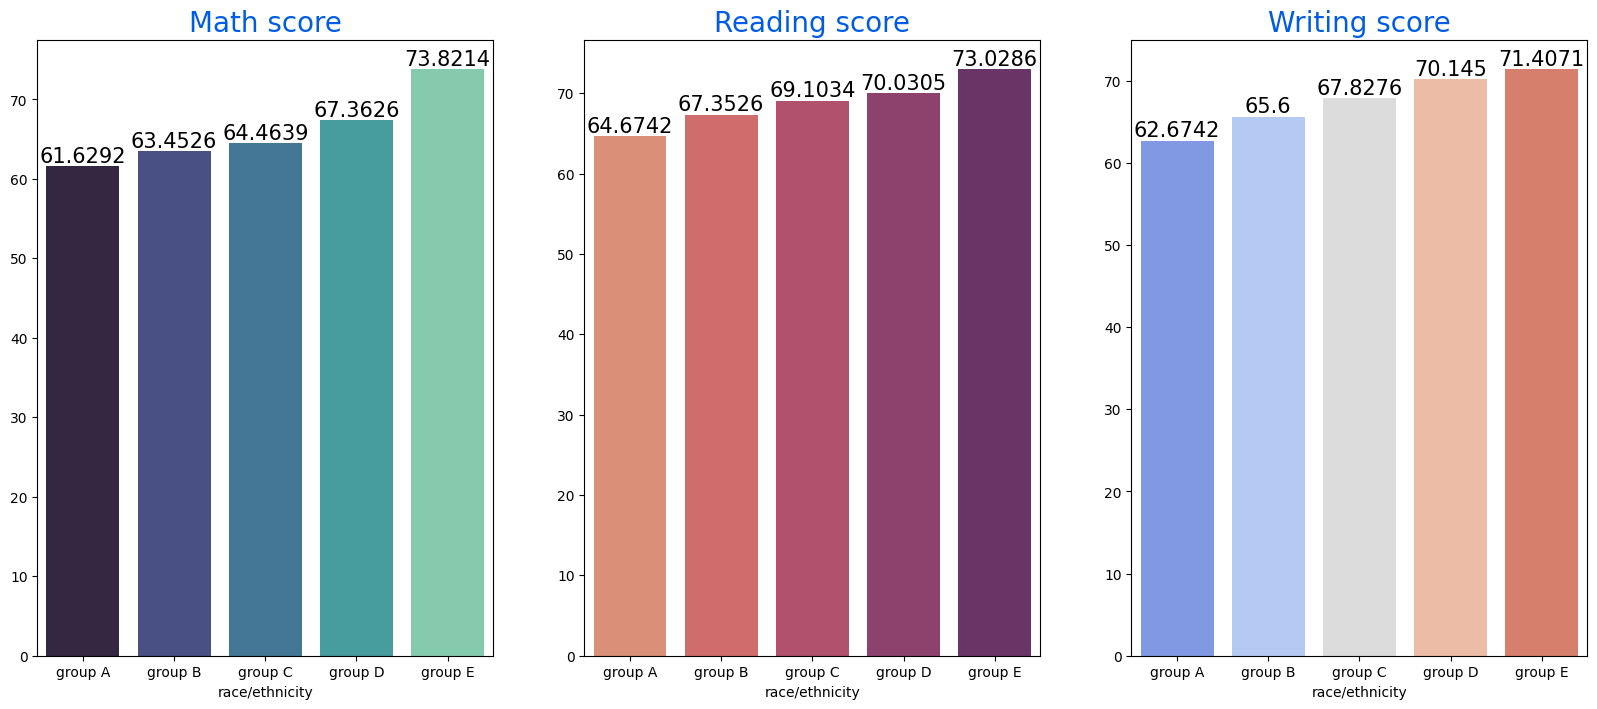

In [32]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


Insight:
    
    Group E performed well in math, reading and writing
    
    Group A performed low in all
    

# Univariate and bivariate analysis - Parental level of education

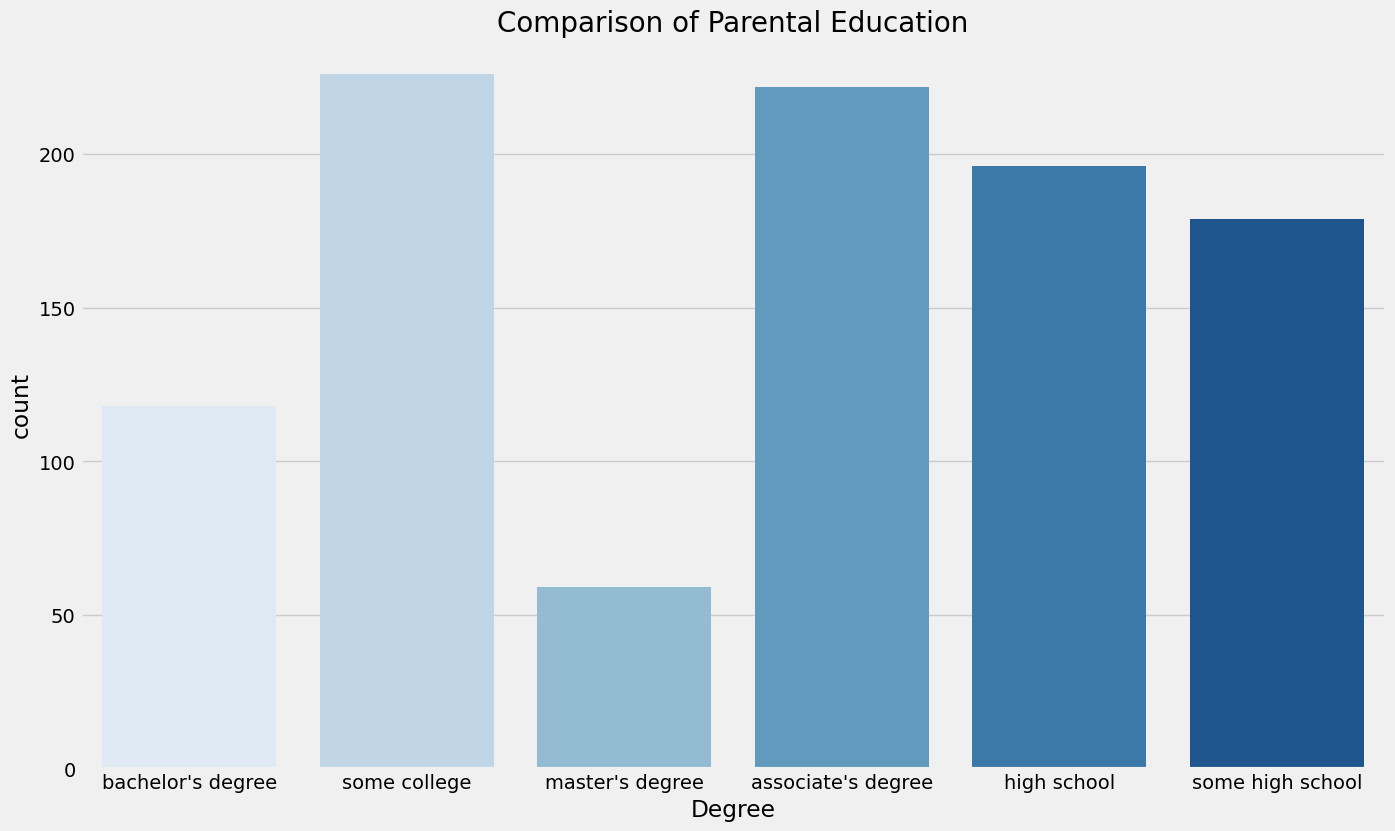

In [37]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'],data=df, palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Largest number of student's parents level of education os from some college

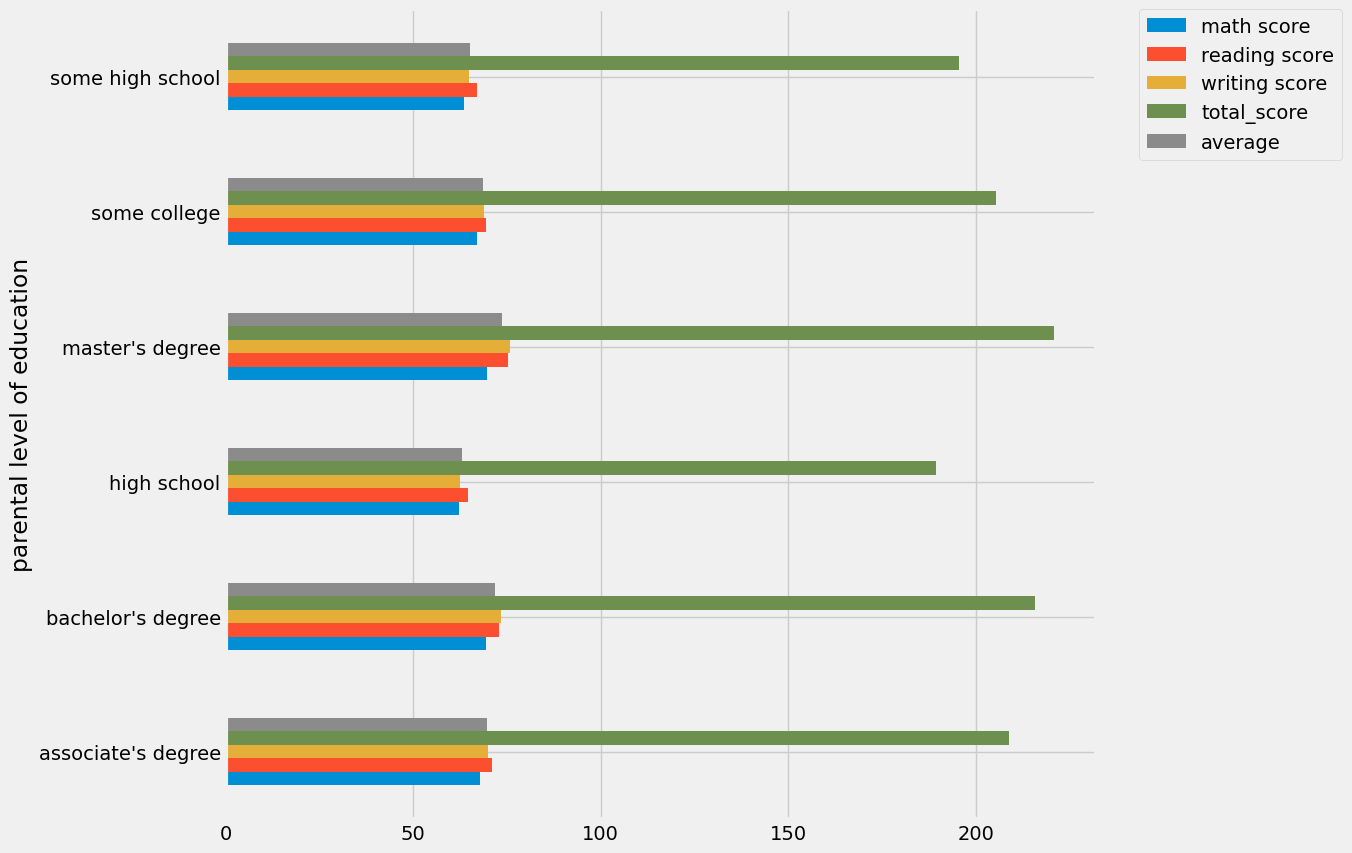

In [38]:
#bivariate analysis
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Total scores of students is higher whose parents are having bachelores or masters degree

# Lunch - Bivariate and multivariate analysis

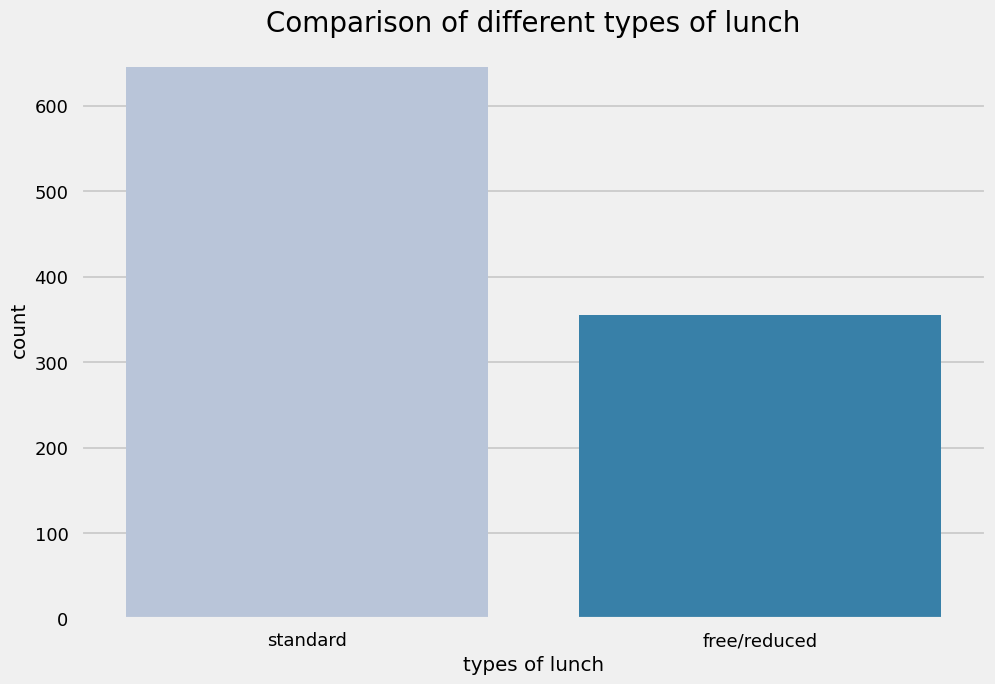

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'], data=df,palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

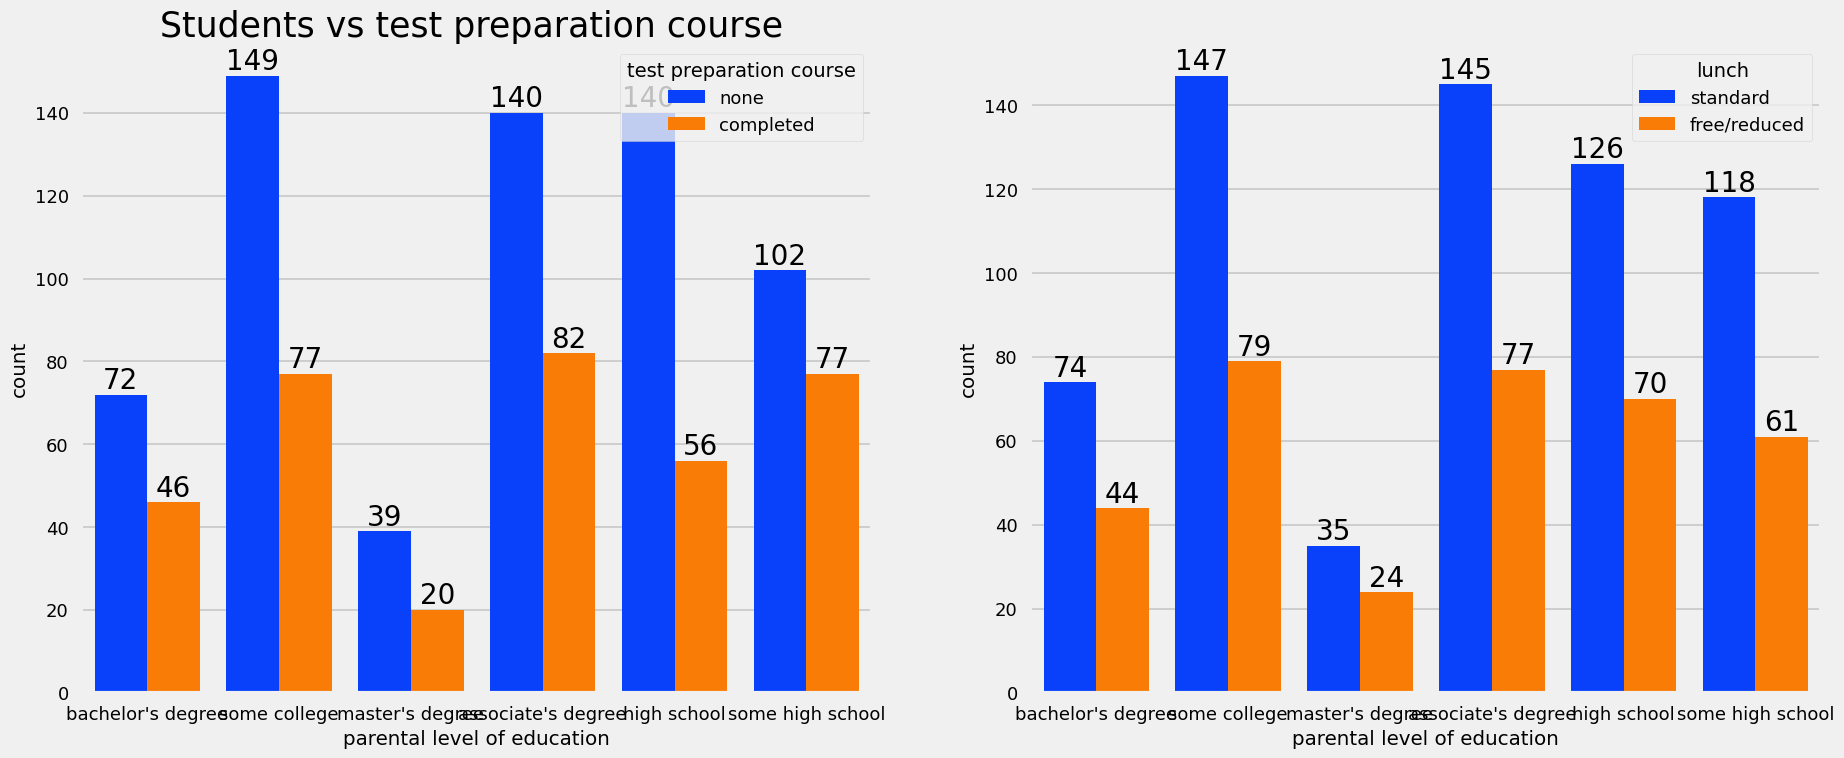

In [40]:
#bivariate analysis

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

Is test preparation has any impact on student performance

<Axes: xlabel='lunch', ylabel='writing score'>

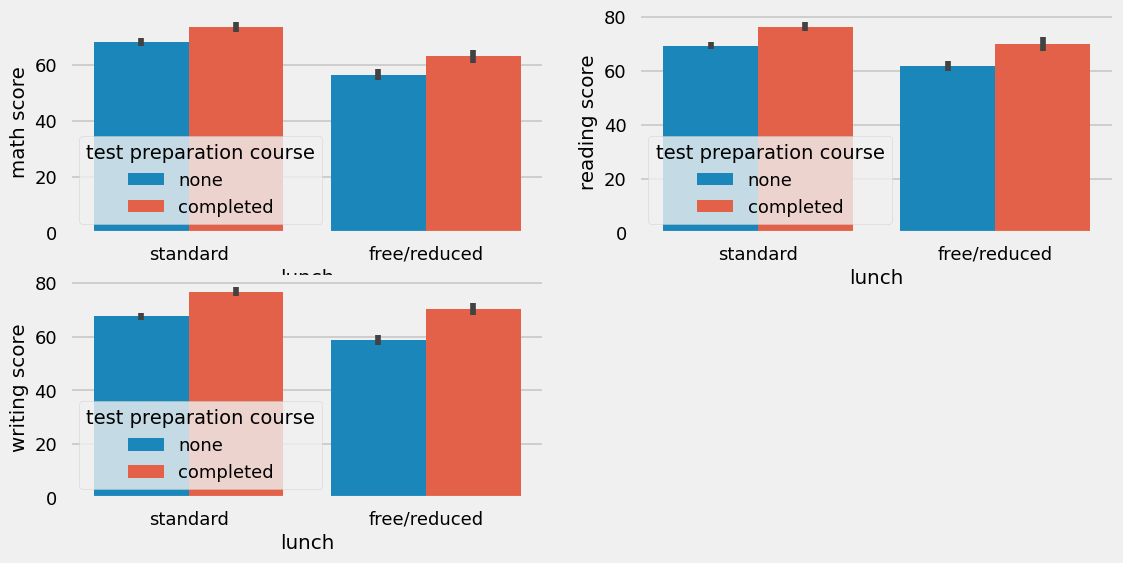

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

Standard lunch has an positive impact on student performance

# Multivariate analysis - pairplot

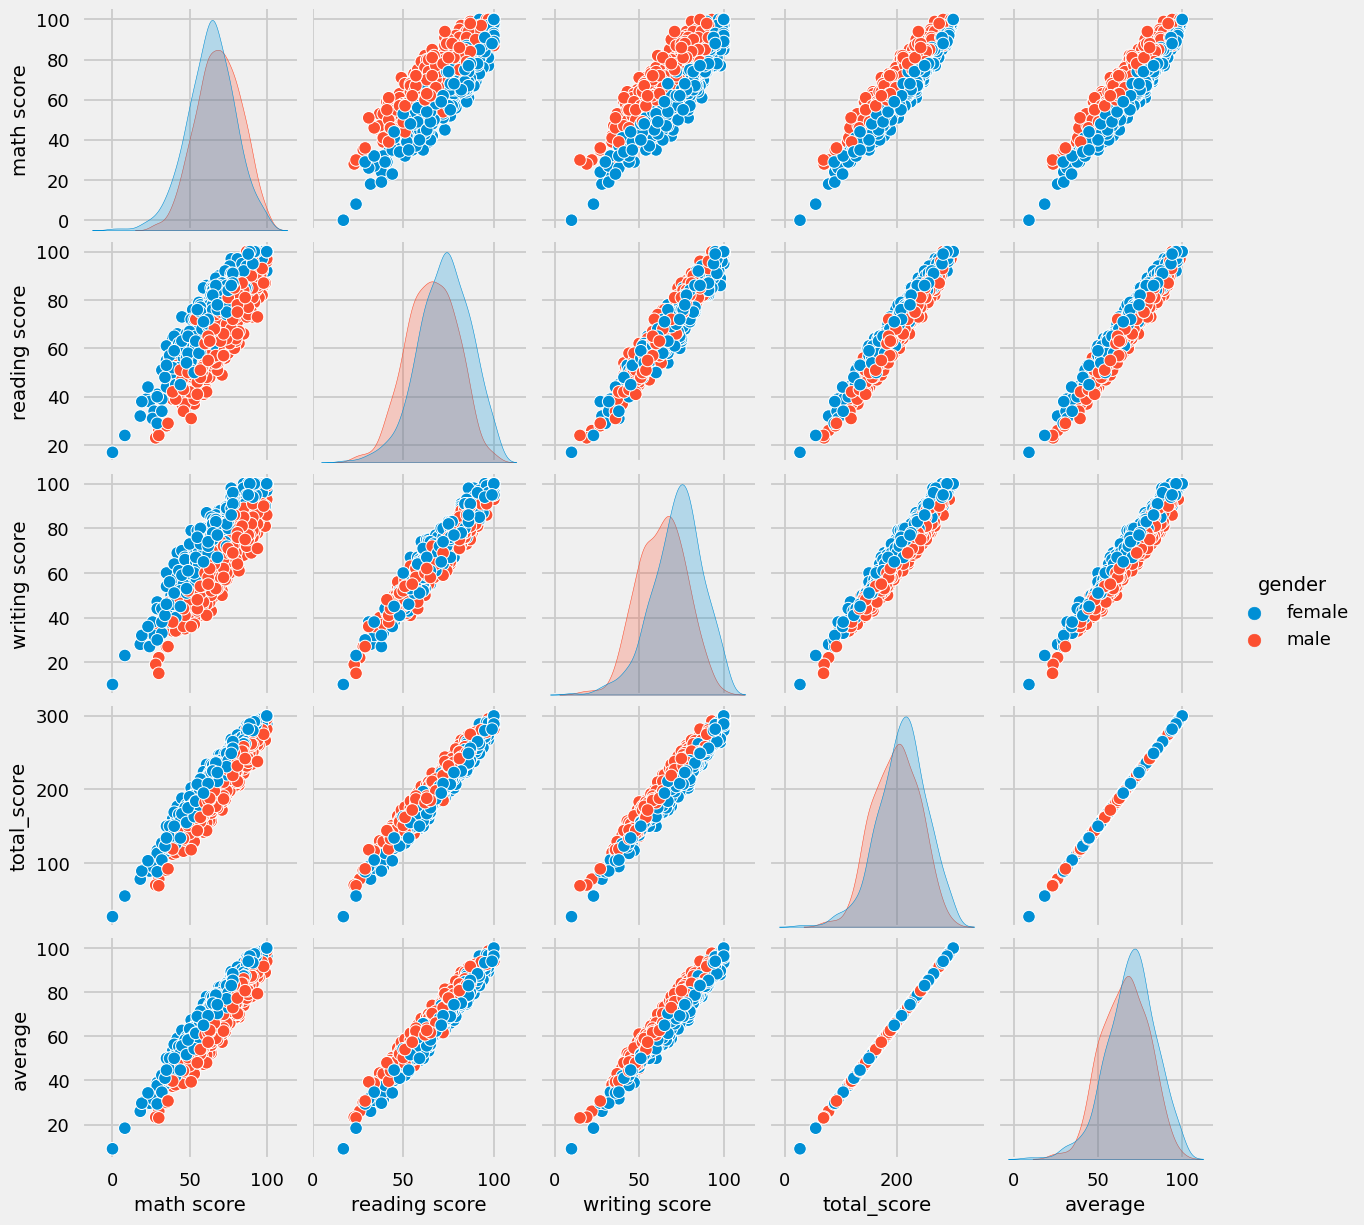

In [43]:
sns.pairplot(df,hue = 'gender')
plt.show()

We can see a linear trend in the data, it can tell us how we can build a model wround this data.

# Checking for outlier

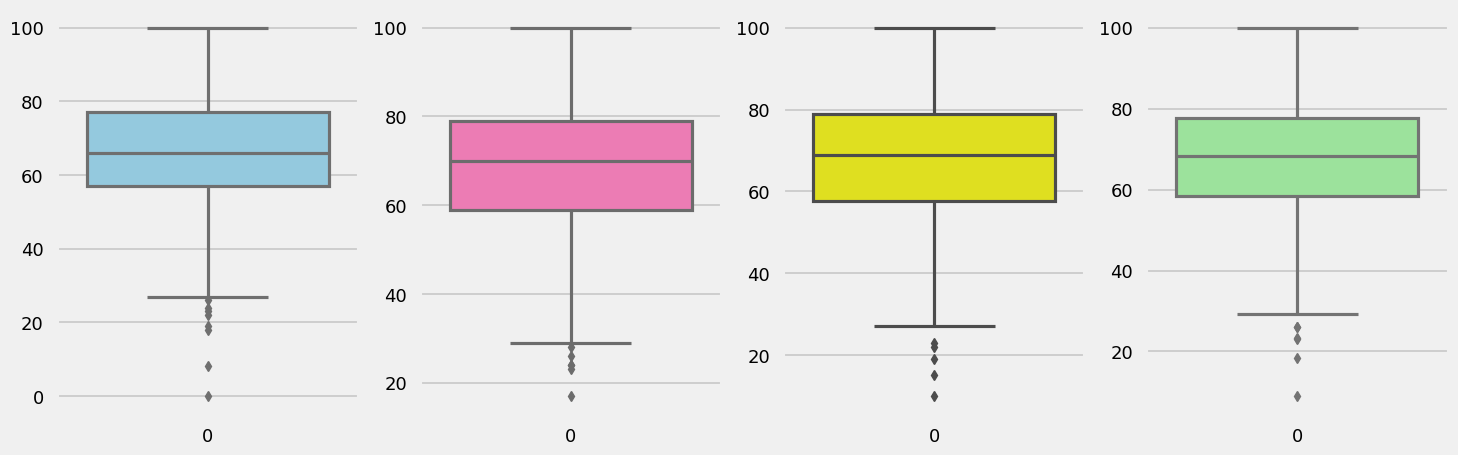

In [42]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

Conclusion:

- Student's performance is related with lunch, race, parental education

- Females candidates are good performer


In [1]:
pip install -U notebook-as-pdf

  Using cached notebook_as_pdf-0.5.0-py3-none-any.whl (6.5 kB)
  Using cached pypdf2-3.0.1-py3-none-any.whl (232 kB)
  Using cached pyppeteer-1.0.2-py3-none-any.whl (83 kB)
     -------------------------------------- 101.4/101.4 kB 6.1 MB/s eta 0:00:00
  Using cached pyee-8.2.2-py2.py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyppeteer

Note: you may need to restart the kernel to use updated packages.
